In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC, SVR
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from pylab import rcParams

In [3]:
df=pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


C:\Users\Ali Haider\anaconda33\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Ali Haider\anaconda33\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Ali Haider\anaconda33\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Ali Haider\anaconda33\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


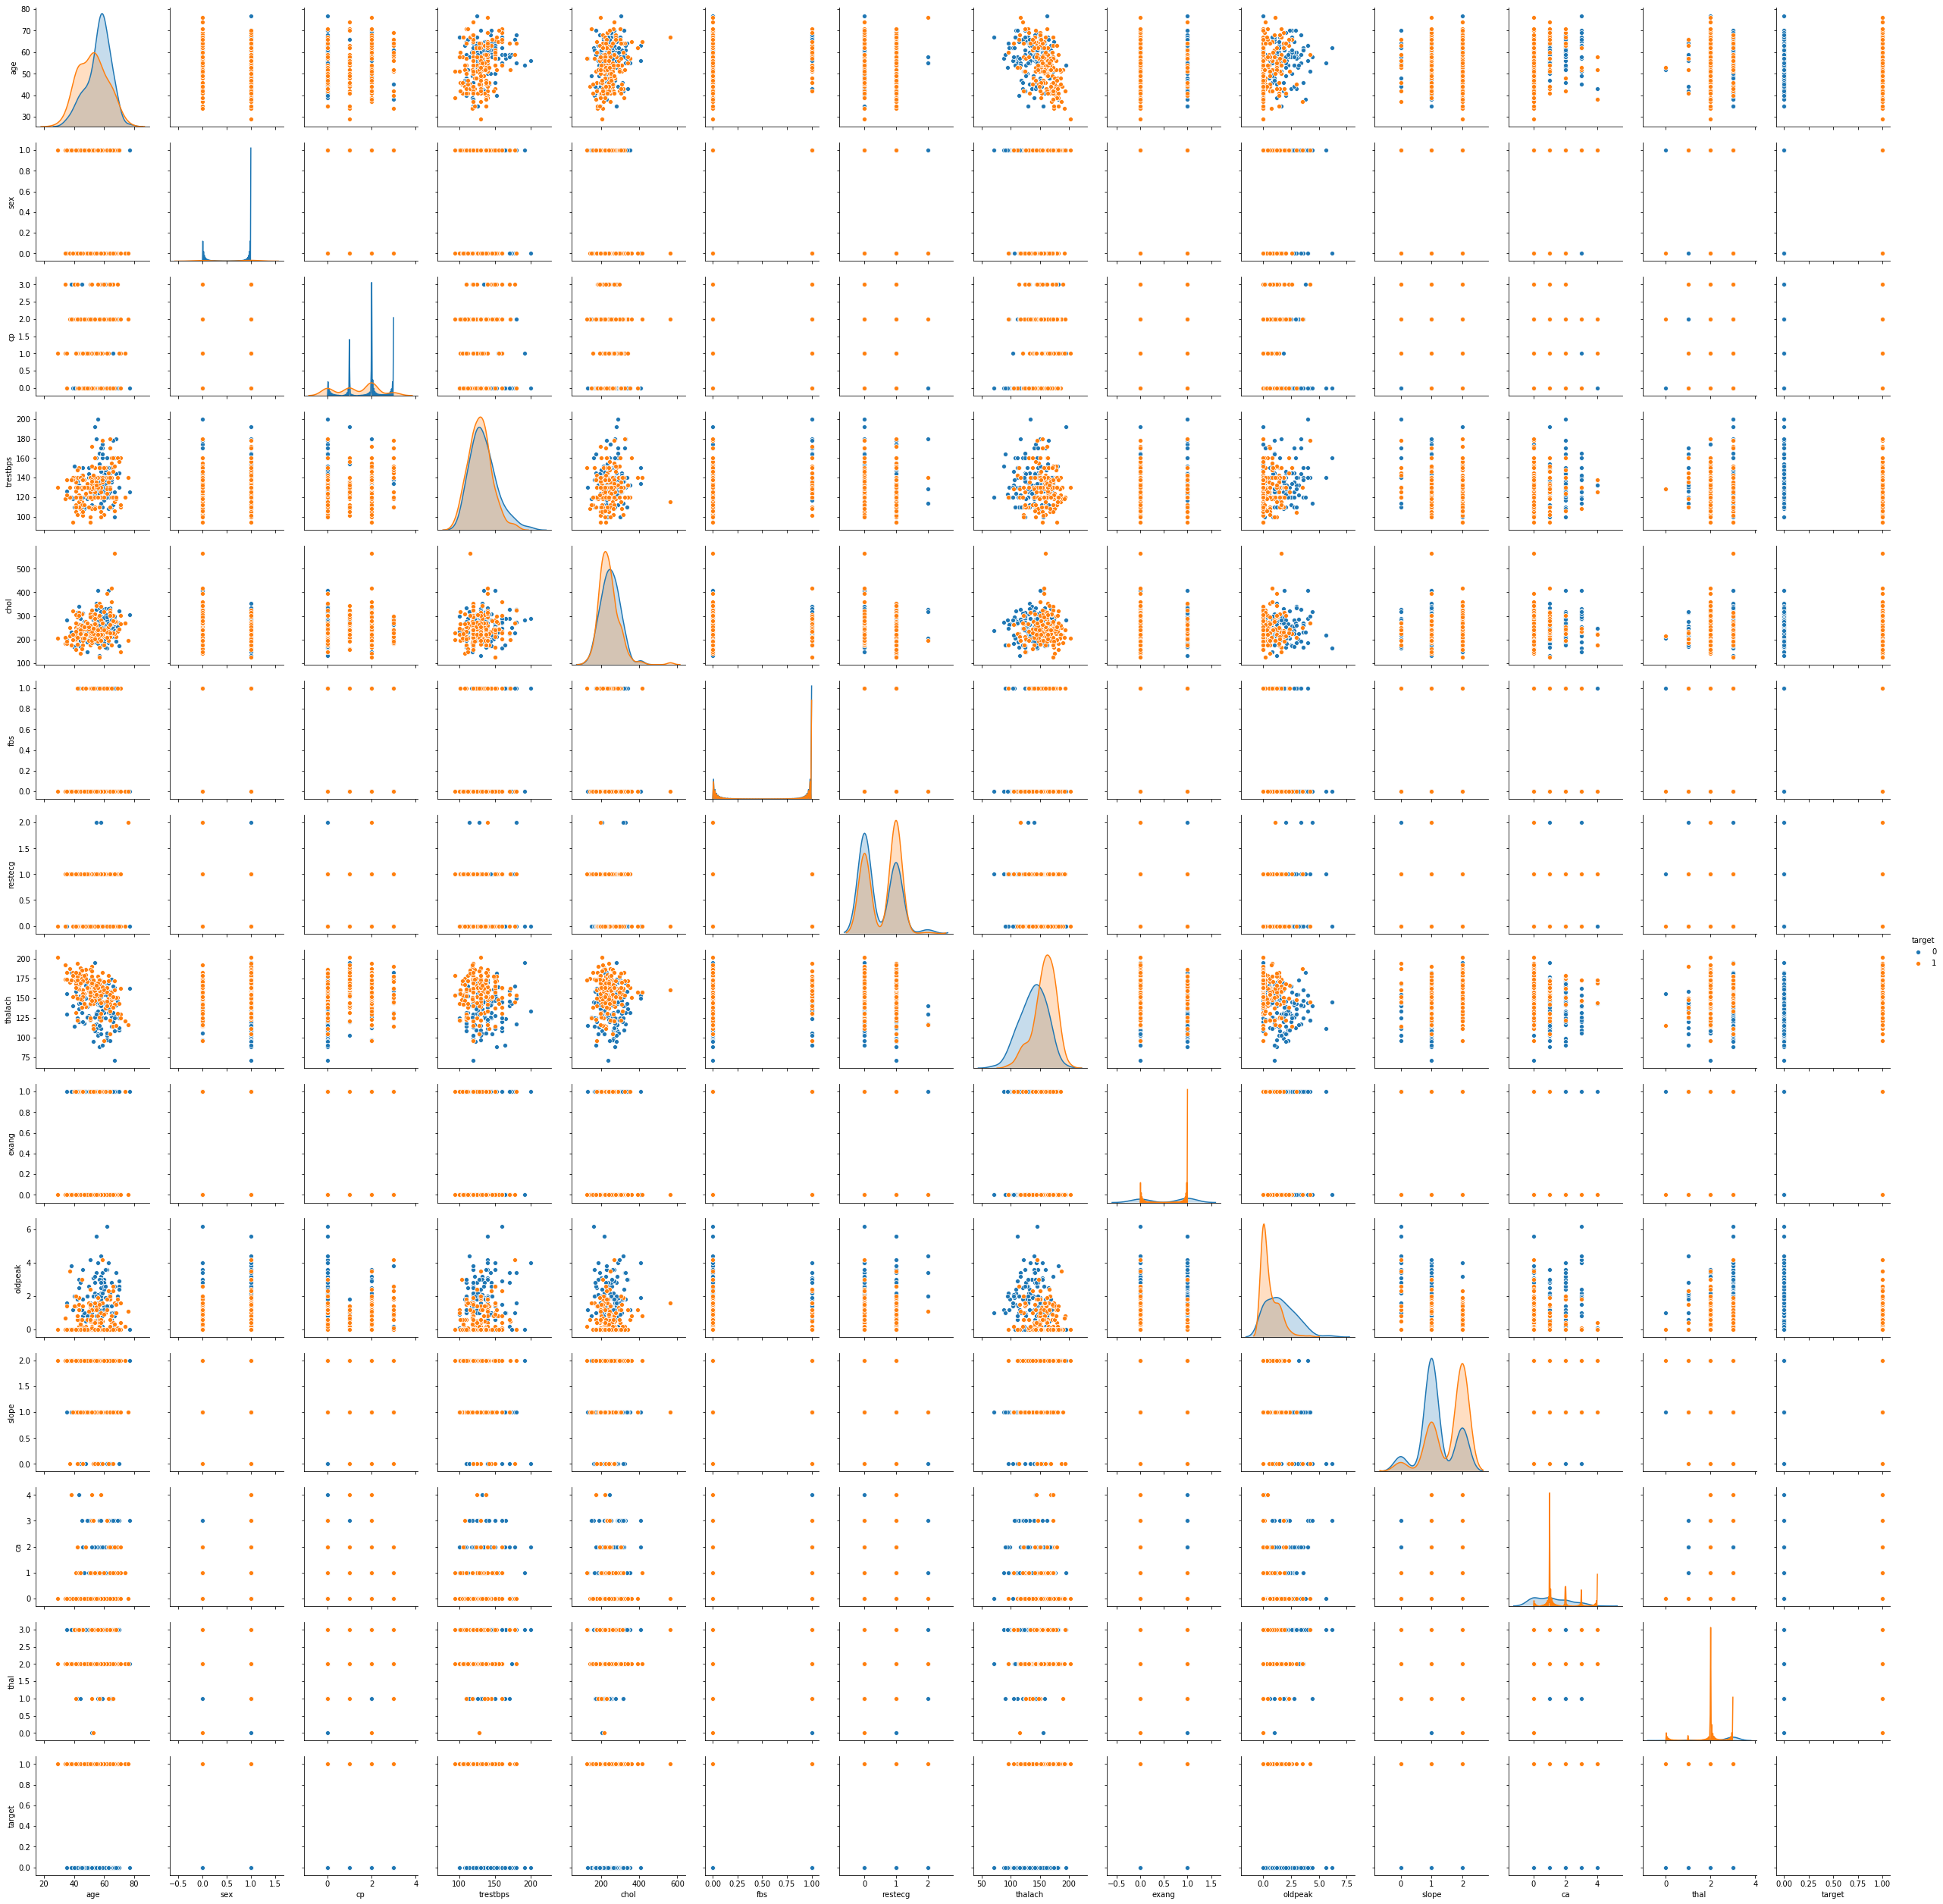

In [10]:
sns.pairplot(df, hue="target")

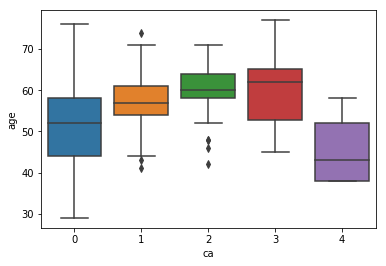

In [15]:
sns.boxplot(x='ca', y='age', data=df)

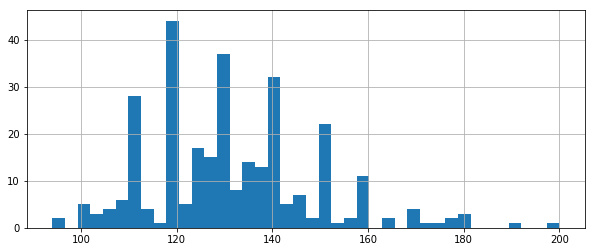

In [22]:
df['trestbps'].hist(bins=40, figsize=(10, 4))

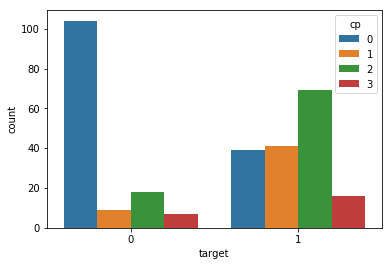

In [24]:
sns.countplot(x='target', hue='cp', data=df)

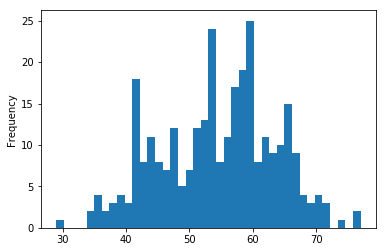

In [25]:
df['age'].plot.hist(bins=40)

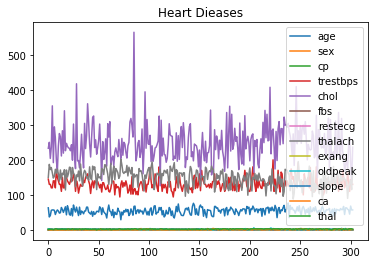

In [65]:
df.drop(['target'], axis=1).plot.line(title='Heart Dieases')

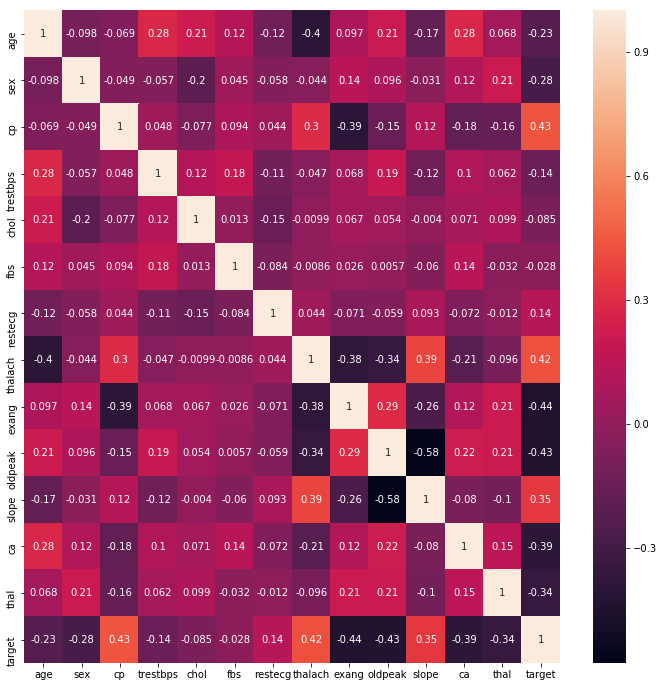

In [33]:
plot.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plot.show()

In [58]:
array = df.values
X = array[:, 0:13]
Y = array[:, 13]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [59]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [86]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RFC', RandomForestClassifier()))
models.append(('GBC',GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)))
models.append(('Decision Tree', tree.DecisionTreeClassifier(criterion='gini')))
models.append(('MultinomialNB',MultinomialNB()))
models.append(('BernoulliNB',BernoulliNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f " % (name, cv_results.mean()*100)
	print(msg)

LR: 86.716667 
LDA: 85.466667 
KNN: 63.983333 
CART: 79.316667 
NB: 82.616667 
RFC: 82.583333 
GBC: 81.366667 
Decision Tree: 78.500000 
MultinomialNB: 74.366667 
BernoulliNB: 81.350000 
SVM: 55.783333 


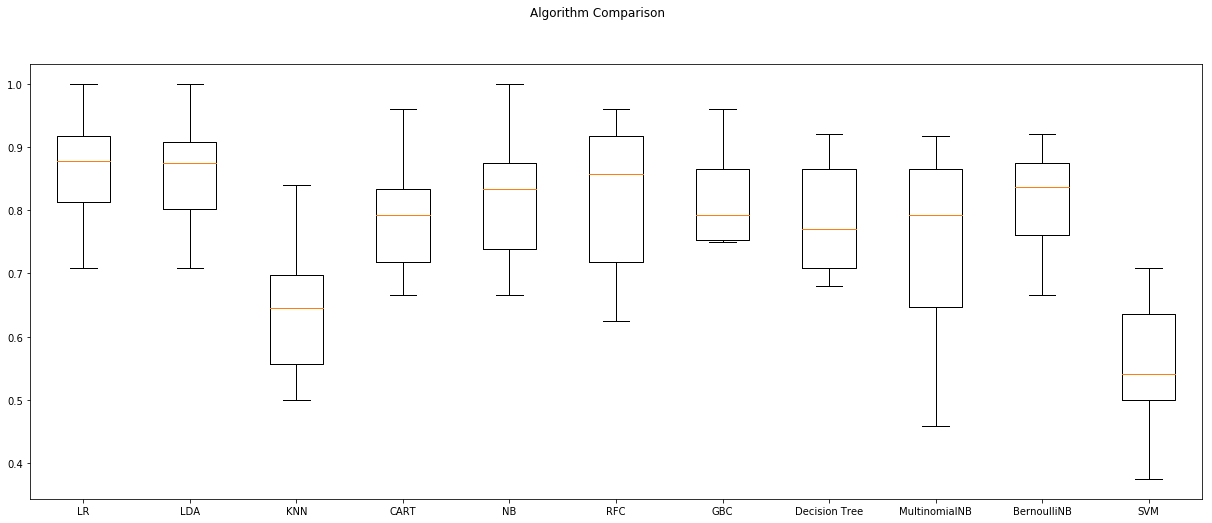

In [88]:
#Select Best Model
# Compare Algorithms
rcParams['figure.figsize']=21,8
fig = plot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plot.boxplot(results)
ax.set_xticklabels(names)
plot.show()

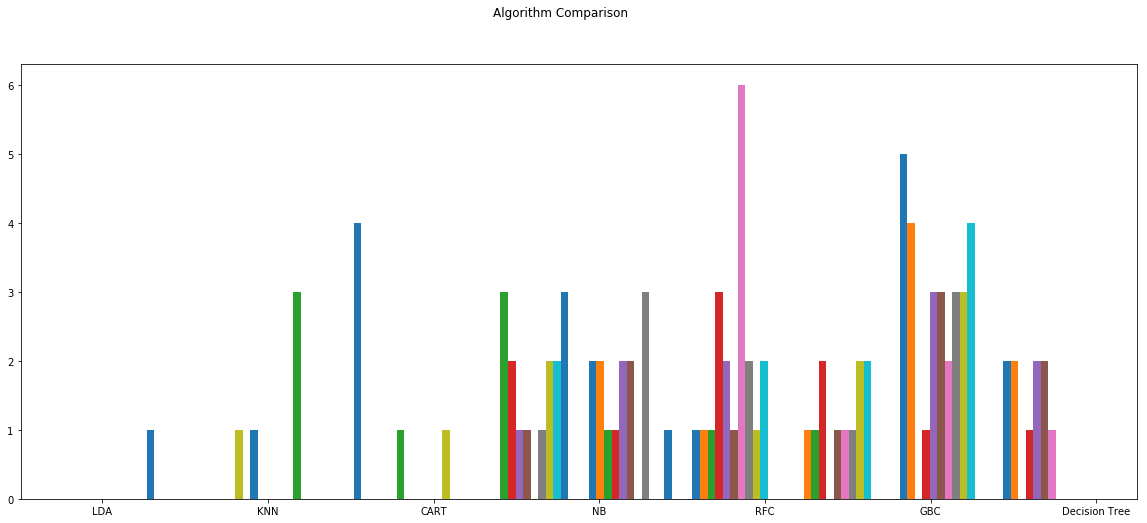

In [103]:
rcParams['figure.figsize']=20,8
fig = plot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plot.hist(results)
ax.set_xticklabels(names)
plot.show()

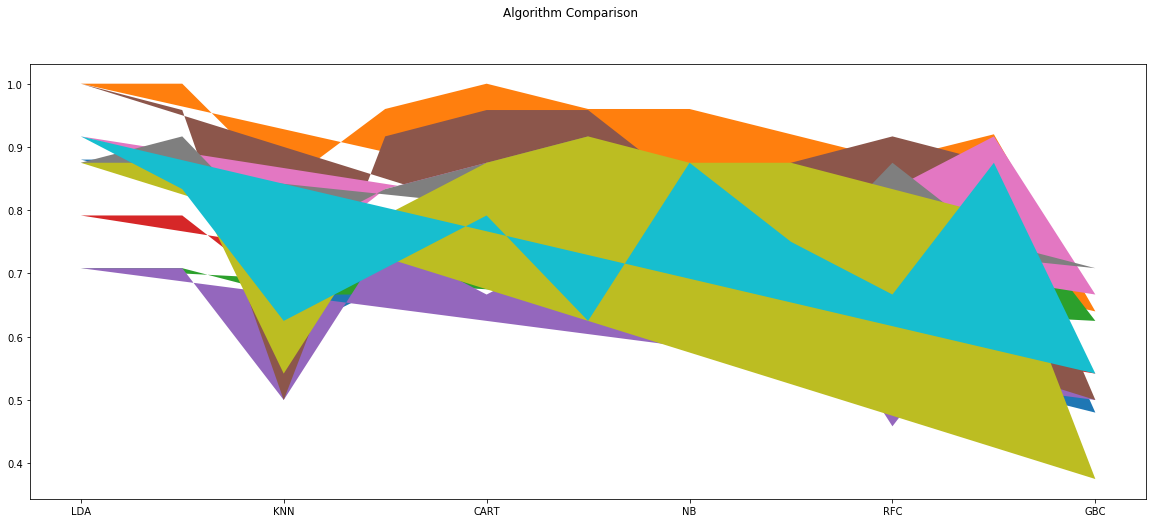

In [110]:
rcParams['figure.figsize']=20,8
fig = plot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plot.fill(results)
ax.set_xticklabels(names)
plot.show()